# 01 -  EAD

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [ ]:
# Packages version
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'seaborn: {sns.__version__}')
print(f'logging: {logging.__version__}')

kagglehub: 0.3.12
pandas: 2.3.1
numpy: 2.0.2
matplotlib: 3.9.4
seaborn: 0.13.2
logging: 0.5.1.2


# 📈 **Credit Risk Model**

This project applies the **CRISP-DM** (*Cross-Industry Standard Process for Data Mining*) methodology to build and evaluate a credit risk scoring model. The process is structured in the following phases:

- **🔎 Business Understanding**  
  Define objectives and understand the business problem of assessing credit risk.

- **📊 Data Understanding**  
  Collect, describe, and explore the dataset to identify data quality issues and gain initial insights.

- **🛠️ Data Preparation**  
  Clean and transform data, engineer features, and create the final modeling dataset.

- **🤖 Modeling**  
  Train and optimize predictive models to assess credit risk scores.

- **✅ Evaluation**  
  Assess model performance against business goals using appropriate metrics.

- **🚀 Deployment**  
  Prepare the model for production use, enabling integration into decision-making workflows. **(Will not be contemplated in this project)**


## **🔎 Business Understanding**

It is crucial for a bank to accurately distinguish reliable clients from high-risk ones. In this context, a credit risk model can help determine whether the institution should extend credit to a given client, using internal and external criteria.  

But what essentially defines a “good” or “bad” client? According to the Central Bank of Brazil (BACEN), a loan is considered in default when payments are more than 90 days overdue. This standard is used for the accounting classification of credit operations and for calculating loss provisions.  

Therefore, a viable approach for a credit risk model is to predict the probability of default.



## **📊 Data Understanding**

This section describes the variables in the German Credit dataset, as adapted from:

> **Credit Scoring and Its Applications**  
> Lyn C. Thomas, David B. Edelman, Jonathan N. Crook

---

### 🎯 **Target Variable**

- **Bad**  
  *Good/Bad indicator*  
  - 1 = Bad (default)  
  - 0 = Good (non-default)  

---

### 👤 **Applicant Information**

| Variable | Description                                        |
|----------|----------------------------------------------------|
| yob      | Year of birth *(If unknown, coded as 99)*          |
| nkid     | Number of children                                 |
| dep      | Number of other dependents                         |
| phon     | Has home phone (1 = yes, 0 = no)                   |
| sinc     | Spouse's income                                    |

---

### 💼 **Applicant Employment Status (aes)**

| Code | Meaning            |
|------|--------------------|
| V    | Government         |
| W    | Housewife          |
| M    | Military           |
| P    | Private sector     |
| B    | Public sector      |
| R    | Retired            |
| E    | Self-employed      |
| T    | Student            |
| U    | Unemployed         |
| N    | Others             |
| Z    | No response        |

---

### 💰 **Applicant Income**

- **dainc**: Applicant's income

---

### 🏠 **Residential Status (res)**

| Code | Meaning             |
|------|---------------------|
| O    | Owner               |
| F    | Tenant Furnished    |
| U    | Tenant Unfurnished  |
| P    | With Parents        |
| N    | Other               |
| Z    | No response         |

---

### 🏡 **Home Value and Mortgage**

- **dhval**: Value of home  
  - 0 = No response / not owner
  - 000001 = Zero value
  - Blank = No response

- **dmort**: Mortgage balance outstanding  
  - 0 = No response / not owner
  - 000001 = Zero balance
  - Blank = No response

---

### 💸 **Outgoings**

| Variable | Description                              |
|----------|------------------------------------------|
| doutm    | Outgoings on mortgage or rent           |
| doutl    | Outgoings on loans                      |
| douthp   | Outgoings on hire purchase              |
| doutcc   | Outgoings on credit cards               |


In [15]:
# Read CSV file
df = pd.read_csv('./Data/Loan Data.csv', sep=';')
df.head()


,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistics of the Data set

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOB     1225 non-null   float64
 1   NKID    1225 non-null   float64
 2   DEP     1225 non-null   float64
 3   PHON    1225 non-null   int64  
 4   SINC    1225 non-null   float64
 5   AES     1225 non-null   object 
 6   DAINC   1225 non-null   float64
 7   RES     1225 non-null   object 
 8   DHVAL   1225 non-null   float64
 9   DMORT   1225 non-null   float64
 10  DOUTM   1225 non-null   float64
 11  DOUTL   1225 non-null   float64
 12  DOUTHP  1225 non-null   float64
 13  DOUTCC  1225 non-null   float64
 14  BAD     1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


In [17]:
df.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,51.037551,0.623673,0.038367,0.903673,1990.084898,21244.211429,15693.857959,11225.691429,342.004898,121.926531,28.721633,39.595102,0.263673
std,15.301818,1.016013,0.219917,0.295159,4802.341425,15896.207986,20736.331833,18889.207107,427.993865,839.639588,119.324084,168.697101,0.440804
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19500.000000,0.000000,0.000000,256.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1040.000000,30600.000000,28928.000000,20000.000000,528.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


/var/folders/jd/dg4_wpm92qlc7b6h0sj03kr40000gn/T/ipykernel_48580/68258762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='BAD', palette=['orange', 'blue'])


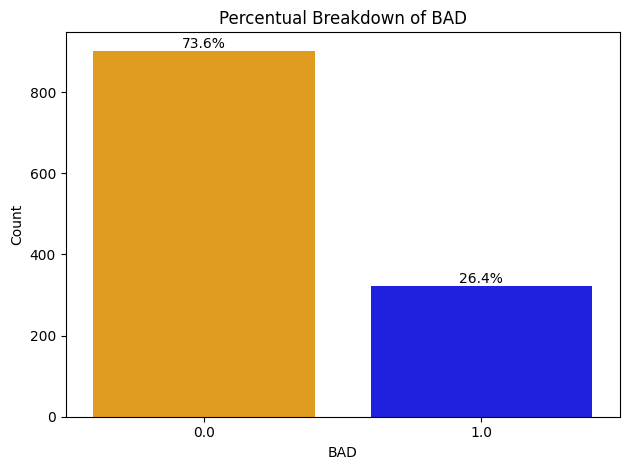

In [18]:

# Count Plot
ax = sns.countplot(data=df, x='BAD', palette=['orange', 'blue'])
plt.title('Percentual Breakdown of BAD')
plt.xlabel('BAD')
plt.ylabel('Count')


total = len(df)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


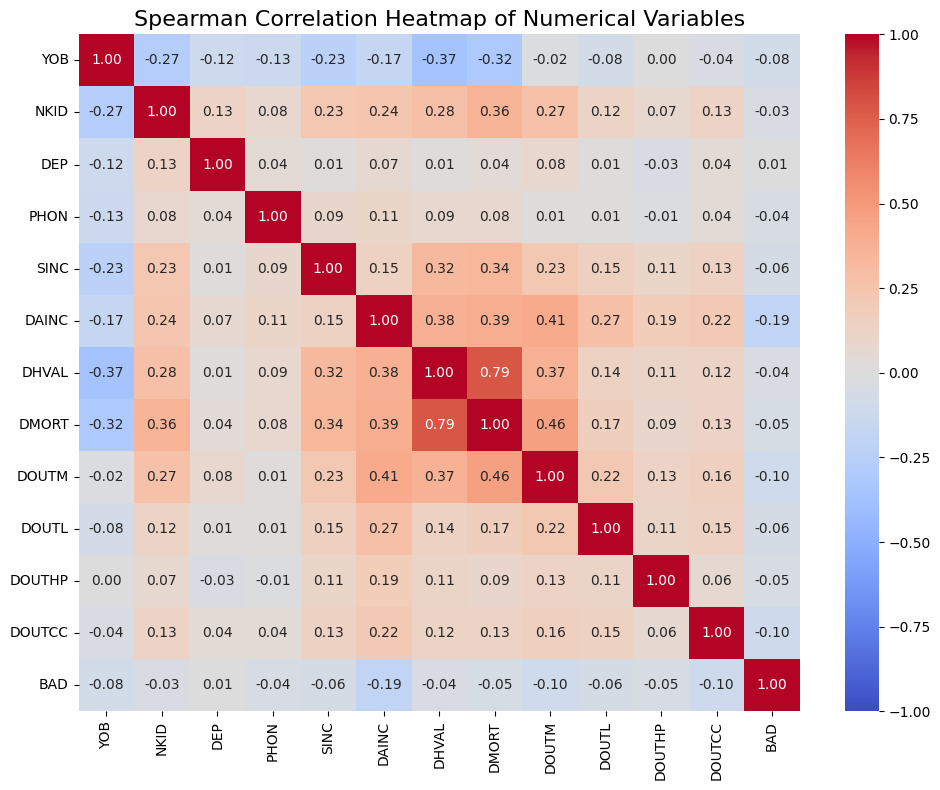

In [19]:
# Compute the correlation matrix
corr_matrix = df.drop(columns=['AES','RES']).corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
# Correlation between the target variable (BAD) and the numerical features of the Data set
df.drop(columns=['AES','RES']).corr(method='spearman')['BAD'].sort_values()

print(140*'-')
print('Correlation between the target variable (BAD) and the numerical features of the Data set')
print(140*'-')
print('The Four Variables Most Strongly Correlated with BAD (absolute value):')

for col, val in abs(df.drop(columns=['AES','RES'])
                    .corr(method='spearman')['BAD']) \
                    .sort_values(ascending=False)[1:5].items():
    print(col, val)

print(140*'-')
print('Obs. None of the atributes present a strong correlation with BAD!')

--------------------------------------------------------------------------------------------------------------------------------------------
Correlation between the target variable (BAD) and the numerical features of the Data set
--------------------------------------------------------------------------------------------------------------------------------------------
The Four Variables Most Strongly Correlated with BAD (absolute value):
DAINC 0.19106683843338934
DOUTCC 0.1030551891147625
DOUTM 0.09956327687684481
YOB 0.07907785916729035
--------------------------------------------------------------------------------------------------------------------------------------------
Obs. None of the atributes present a strong correlation with BAD!


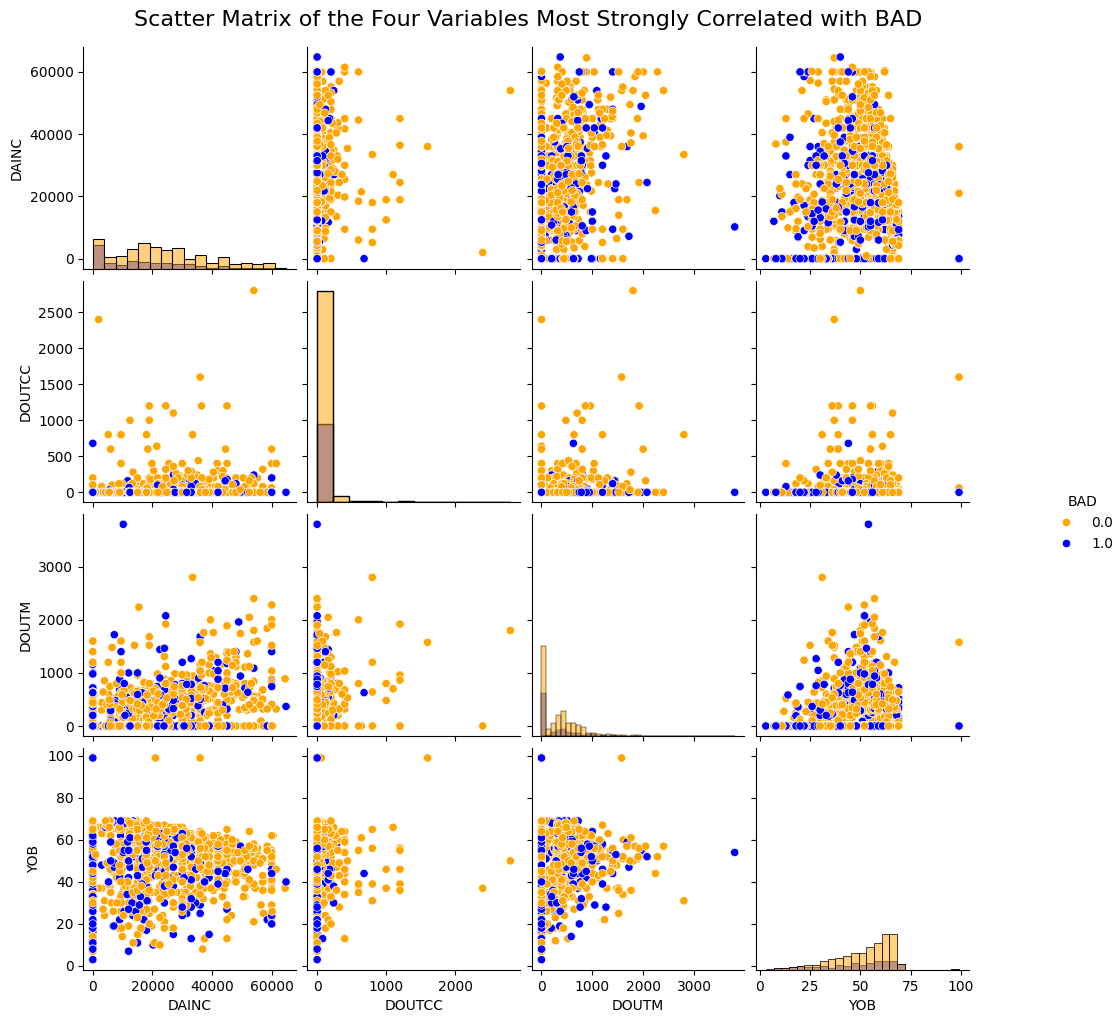

In [21]:
# Scatter Matrix Plot 

features = ['BAD', 'DAINC', 'DOUTCC', 'DOUTM', 'YOB']

g = sns.pairplot(
    df[features],
    hue='BAD',
    diag_kind='hist',
    palette={0: 'orange', 1: 'blue'}
)

# Adiciona título geral
g.fig.suptitle(
    'Scatter Matrix of the Four Variables Most Strongly Correlated with BAD',
    fontsize=16,
    y=1.02
)

# Ajusta a legenda para fora da grade
g._legend.set_title('BAD')
g._legend.set_bbox_to_anchor((1.05, 0.5))

plt.show()
